In [2]:
from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import cm
from numpy import*
import numpy as np
from scipy import stats
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [3]:
dset=np.fromfile('gpcc_mon_jawabali_1901_2010.dat',dtype=np.float32)

#BUANG NaN
idNaN=find(dset<0)
dummy=np.empty(idNaN.size)
dummy[:]=np.nan
dset[idNaN]=dummy

nt=1320
ny=9
nx=23

#reshape data menjadi data 3 dimensi
#data=np.reshape(dset,(ny*nx,nt))
data=np.reshape(dset,(nt,ny,nx))
data.shape

(1320, 9, 23)

In [4]:
#komposit data menjadi 12 bulan
data1 = np.reshape(data,(110,12,ny,nx))
#data1 = np.reshape(data,(12,110,ny,nx))
new_data = np.empty((12,ny,nx))

for i in range (0,ny,1):
    for j in range (0,nx,1):
        for k in range (0,12,1):
            #new_data[k,i,j] = np.nanmean(data1[k,:,i,j])
            new_data[k,i,j] = np.nanmean(data1[:,k,i,j])

In [5]:
new_data1 = np.reshape(new_data,(12,ny*nx))
#new_data1 = np.reshape(new_data,(12*ny*nx))
#data_cluster = np.reshape(new_data1,(ny*nx,12))
data_cluster = np.transpose(new_data1)
data_cluster.shape

(207, 12)

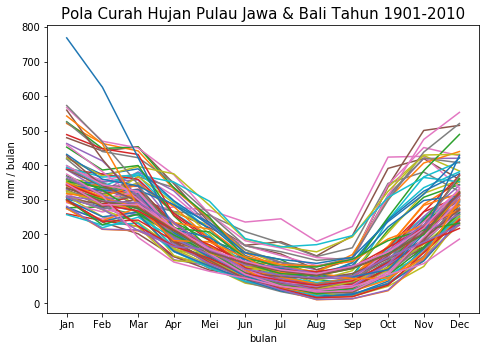

In [6]:
fig1=plt.figure()
ax = fig1.add_axes([0, 0, 1, 1])

kode = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
bulan = ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in range(207):
    ax.plot(data_cluster[i,:])
    ax.set_title('Pola Curah Hujan Pulau Jawa & Bali Tahun 1901-2010',fontsize=15)
    plt.xticks(kode, bulan)
    ax.set_xlabel('bulan')
    ax.set_ylabel('mm / bulan')

In [12]:
data_cluster_fix = np.reshape(data_cluster[~isnan(data_cluster)],(85,12))
data_cluster_fix.size

1019

In [7]:
# generate the linkage matrix
Z = linkage(data_cluster_fix, 'ward')
# first 20 iteration
Z[:20] #[idx1, idx2, dist, sample_count]

array([[48.     , 67.     , 11.03182,  2.     ],
       [78.     , 83.     , 12.24703,  2.     ],
       [77.     , 86.     , 25.1053 ,  3.     ],
       [27.     , 28.     , 31.16611,  2.     ],
       [23.     , 25.     , 31.44109,  2.     ],
       [79.     , 84.     , 32.31313,  2.     ],
       [46.     , 65.     , 35.95895,  2.     ],
       [17.     , 34.     , 40.06101,  2.     ],
       [ 5.     ,  6.     , 43.36876,  2.     ],
       [47.     , 66.     , 43.66729,  2.     ],
       [44.     , 45.     , 44.74905,  2.     ],
       [14.     , 61.     , 46.37118,  2.     ],
       [36.     , 37.     , 46.61778,  2.     ],
       [30.     , 73.     , 47.91454,  2.     ],
       [26.     , 29.     , 49.5703 ,  2.     ],
       [62.     , 63.     , 52.90981,  2.     ],
       [64.     , 91.     , 54.96895,  3.     ],
       [82.     , 90.     , 56.13733,  3.     ],
       [74.     , 88.     , 56.27434,  3.     ],
       [69.     , 70.     , 56.57492,  2.     ]])

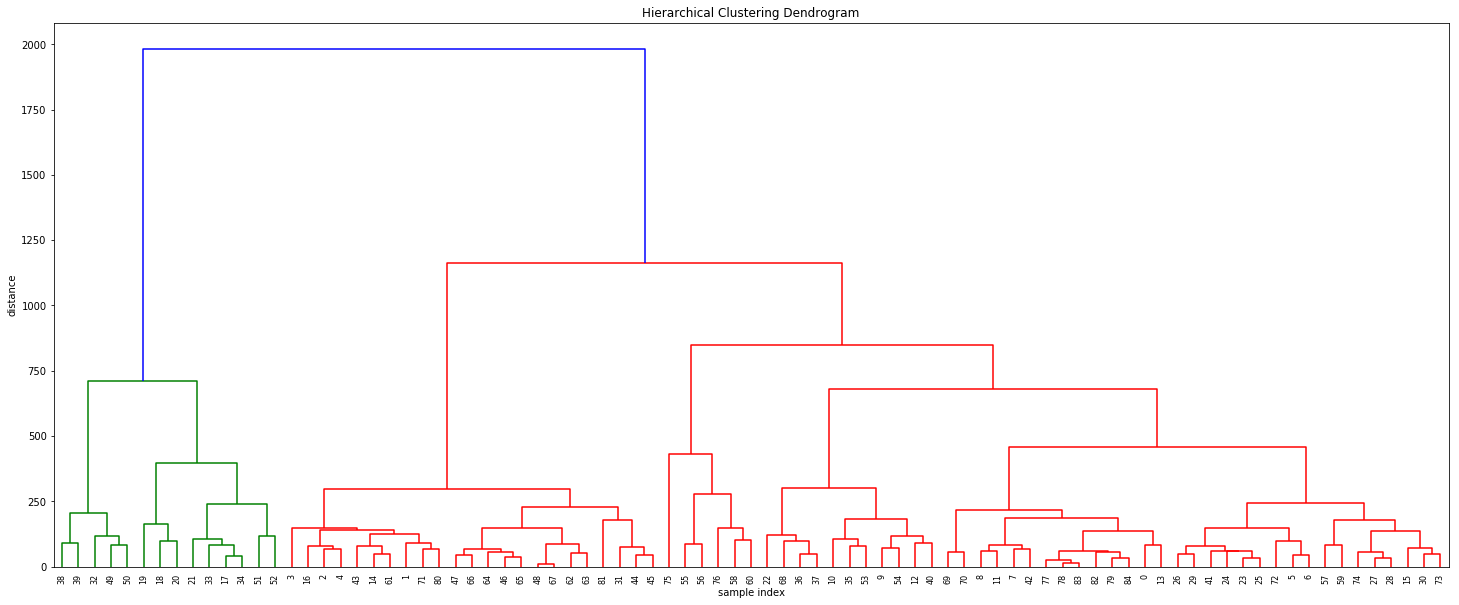

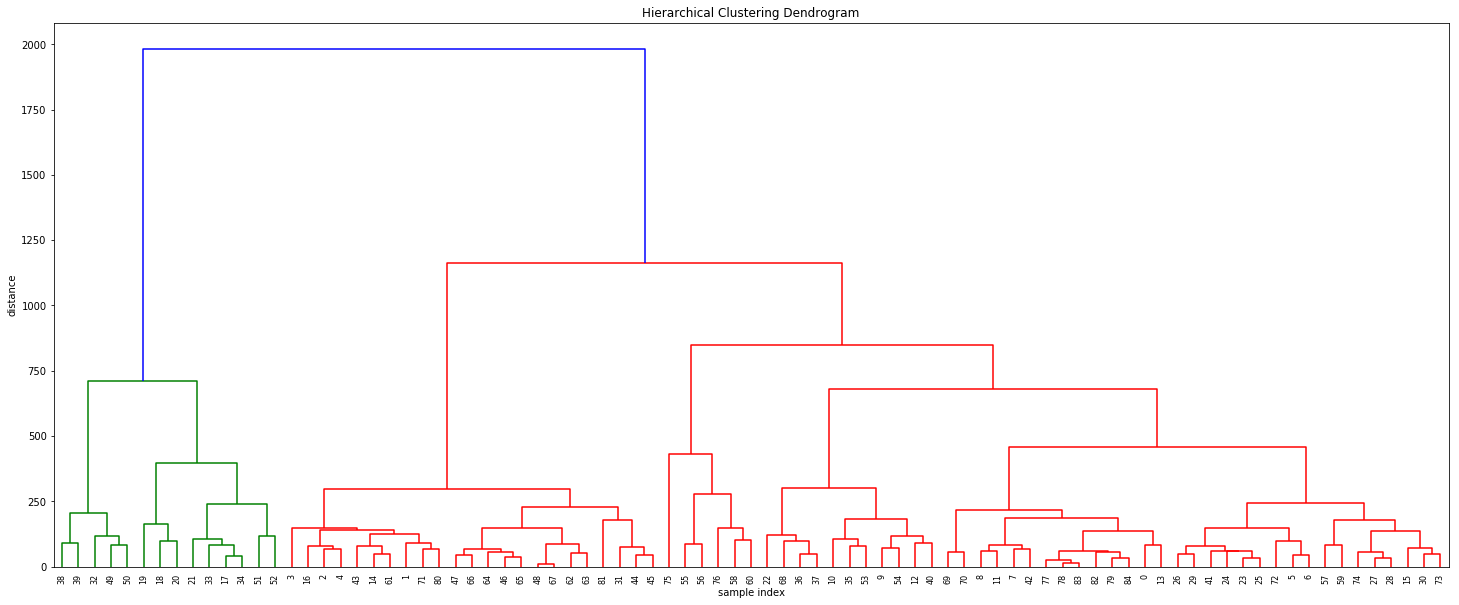

In [8]:
# calculate full dendrogram
fig3=plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
fig3

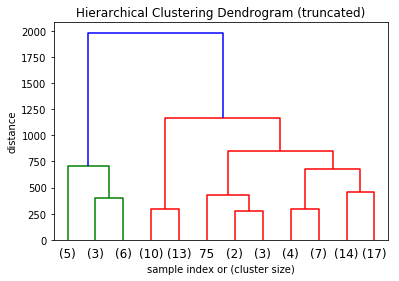

In [9]:
#dendrogram truncation
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12  # show only the last p merged clusters
)
plt.show()

In [10]:
#more fancy dendrogram
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata


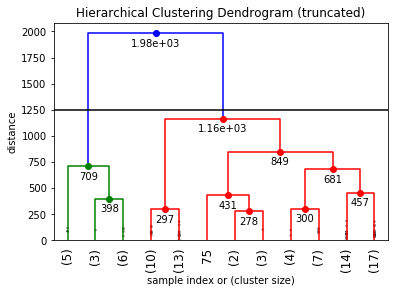

In [11]:
# set cut-off to 50
max_d = 1250  # max_d as in max_distance
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [12]:
#Retrieve the Clusters
max_d = 1250
clusters=fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [13]:
clusters.size

85

In [14]:
cluster_1 = data_cluster_fix[clusters==1,:]
cluster_1.shape

(14, 12)

In [15]:
cluster_2 = data_cluster_fix[clusters==2,:]
cluster_2.shape

(71, 12)

In [16]:
C = data_cluster_fix[clusters,:]
C.shape

(85, 12)

In [17]:
data_clusterx=data_cluster[:,2]  #index 2 menyatakan bulan Maret
data_clusterx=np.reshape(data_clusterx,(ny,nx))
data_clusterx[~isnan(data_clusterx)]=clusters
data_clusterx.shape

(9, 23)

In [18]:
map = Basemap(projection='cyl',llcrnrlon=104.985,llcrnrlat=-9.0126,urcrnrlon=115.978,urcrnrlat=-5.015,resolution='f') # projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full

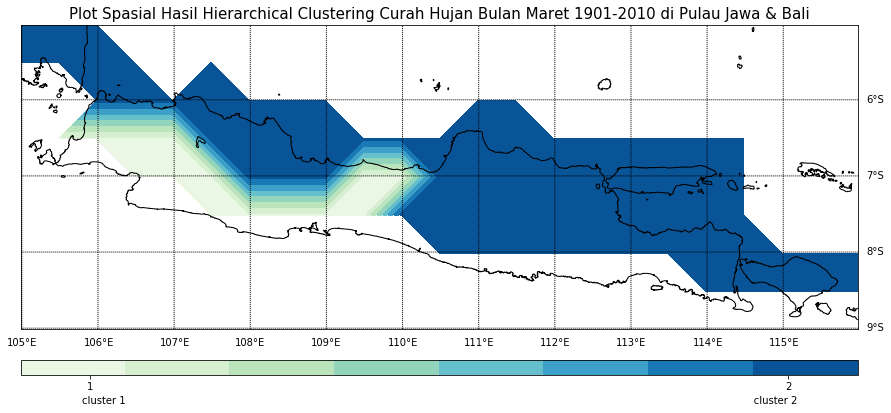

In [19]:
lon,lat = map.makegrid(nx,ny)

fig=plt.figure(figsize=(15,15))
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawcounties() # you can even add counties (and other shapefiles!)

# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(-80,80,1)
# labels = [left,right,top,bottom]
map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,1)
map.drawmeridians(meridians,labels=[True,False,False,True])

plt.title('Plot Spasial Hasil Hierarchical Clustering Curah Hujan Bulan Maret 1901-2010 di Pulau Jawa & Bali',fontsize=15)

gpcc = map.contourf(lon,lat,data_clusterx,cmap='GnBu')
cb = map.colorbar(gpcc,"bottom", size="5%", pad="10%")
cb.set_ticks([1,2])
cb.set_ticklabels([1,2])
cb.set_label('cluster 1                                                                                                                                                                                                         cluster 2')

In [20]:
cluster_1[:,2]  #index 2 menyatakan bulan Maret

array([380.55383, 302.61792, 265.70898, 291.22818, 349.24677, 453.0495 ,
       375.33176, 366.3772 , 441.17099, 452.97702, 449.85052, 421.60437,
       396.02173, 371.53784])

In [21]:
cluster_2[:,2]  #index 2 menyatakan bulan Maret

array([324.49133, 254.99573, 222.407  , 232.85674, 201.34557, 275.83026,
       278.40555, 264.96036, 293.45309, 320.86011, 314.32275, 313.73764,
       338.68359, 306.04617, 256.96555, 312.7464 , 221.17789, 369.73364,
       318.02664, 300.55856, 326.05069, 330.39645, 357.34677, 340.30908,
       322.37106, 314.72421, 264.83572, 366.79855, 377.53156, 389.38403,
       359.05695, 297.26346, 286.35754, 286.45819, 308.65057, 280.31299,
       249.38182, 263.89844, 209.86955, 328.38803, 344.31961, 398.92465,
       430.98505, 310.29636, 294.13818, 300.95874, 344.21988, 234.22101,
       232.07965, 258.3288 , 276.91901, 258.39838, 240.89572, 212.37964,
       340.25601, 263.80493, 261.38763, 223.71884, 272.08017, 294.9664 ,
       324.73755, 421.9194 , 279.75317, 277.91534, 274.33371, 267.38739,
       210.70673, 190.68372, 291.72598, 278.36981, 286.42236])

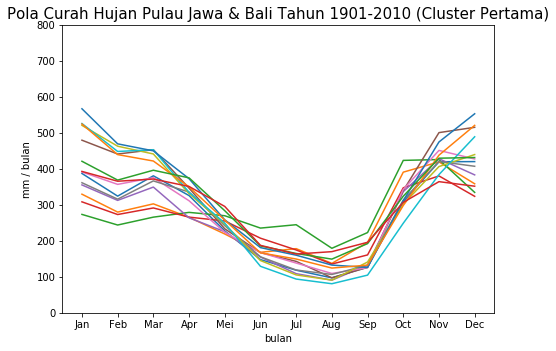

In [22]:
fig2=plt.figure()
ax = fig2.add_axes([0, 0, 1, 1])

kode = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
bulan = ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in range(14):
    ax.plot(cluster_1[i,:])
    ax.set_title('Pola Curah Hujan Pulau Jawa & Bali Tahun 1901-2010 (Cluster Pertama)',fontsize=15)
    plt.xticks(kode, bulan)
    ax.set_yticks([0,100,200,300,400,500,600,700,800])
    ax.set_xlabel('bulan')
    ax.set_ylabel('mm / bulan')

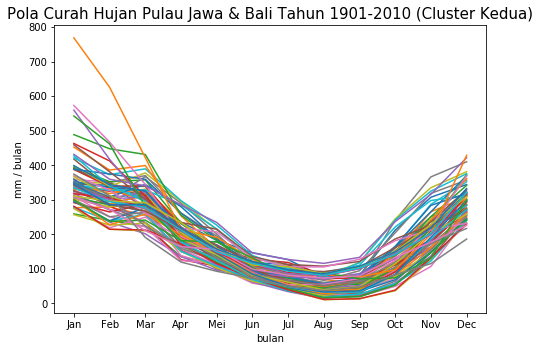

In [23]:
fig5=plt.figure()
ax = fig5.add_axes([0, 0, 1, 1])

kode = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
bulan = ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in range(71):
    ax.plot(cluster_2[i,:])
    ax.set_title('Pola Curah Hujan Pulau Jawa & Bali Tahun 1901-2010 (Cluster Kedua)',fontsize=15)
    plt.xticks(kode, bulan)
    ax.set_yticks([0,100,200,300,400,500,600,700,800])
    ax.set_xlabel('bulan')
    ax.set_ylabel('mm / bulan')

In [24]:
cluster1 = np.empty((12))
for i in range(0,12,1):
    cluster1[i] = np.mean(cluster_1[:,i])

In [25]:
cluster2 = np.empty((12))
for i in range(0,12,1):
    cluster2[i] = np.mean(cluster_2[:,i])

Text(0,0.5,'mm / bulan')

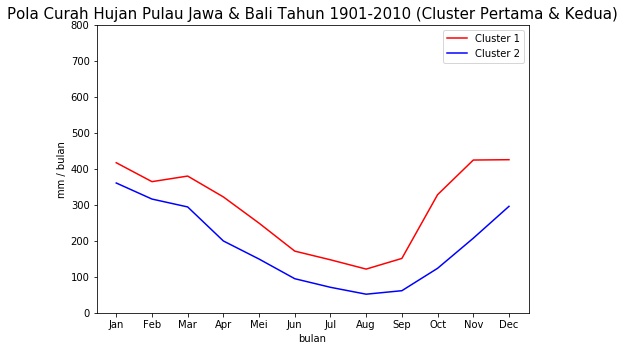

In [26]:
fig5=plt.figure()
ax = fig5.add_axes([0, 0, 1, 1])

kode = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
bulan = ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

ax.plot(cluster1,'r')
ax.plot(cluster2,'b')
ax.set_title('Pola Curah Hujan Pulau Jawa & Bali Tahun 1901-2010 (Cluster Pertama & Kedua)',fontsize=15)
plt.xticks(kode, bulan)
ax.set_yticks([0,100,200,300,400,500,600,700,800])
ax.legend(["Cluster 1", "Cluster 2"],loc=0)
ax.set_xlabel('bulan')
ax.set_ylabel('mm / bulan')